# <span style="color:purple">Task 5: Decision Trees and Random Forests
* Objective: Learn tree-based models for classification & regression.
* Tools: Scikit-learn, Graphviz

**<U>Step 1</U>: Load the Dataset**

In [2]:
import pandas as pd

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**<U>Step 2</U>: Train a Decision Tree Classifier & Visualize the Tree**

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

# Split the data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Visualize tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"])
plt.show()

Matplotlib is building the font cache; this may take a moment.


* **Split the data**

In [4]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* **Train Decision Tree**

In [5]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

* **Visualize tree**

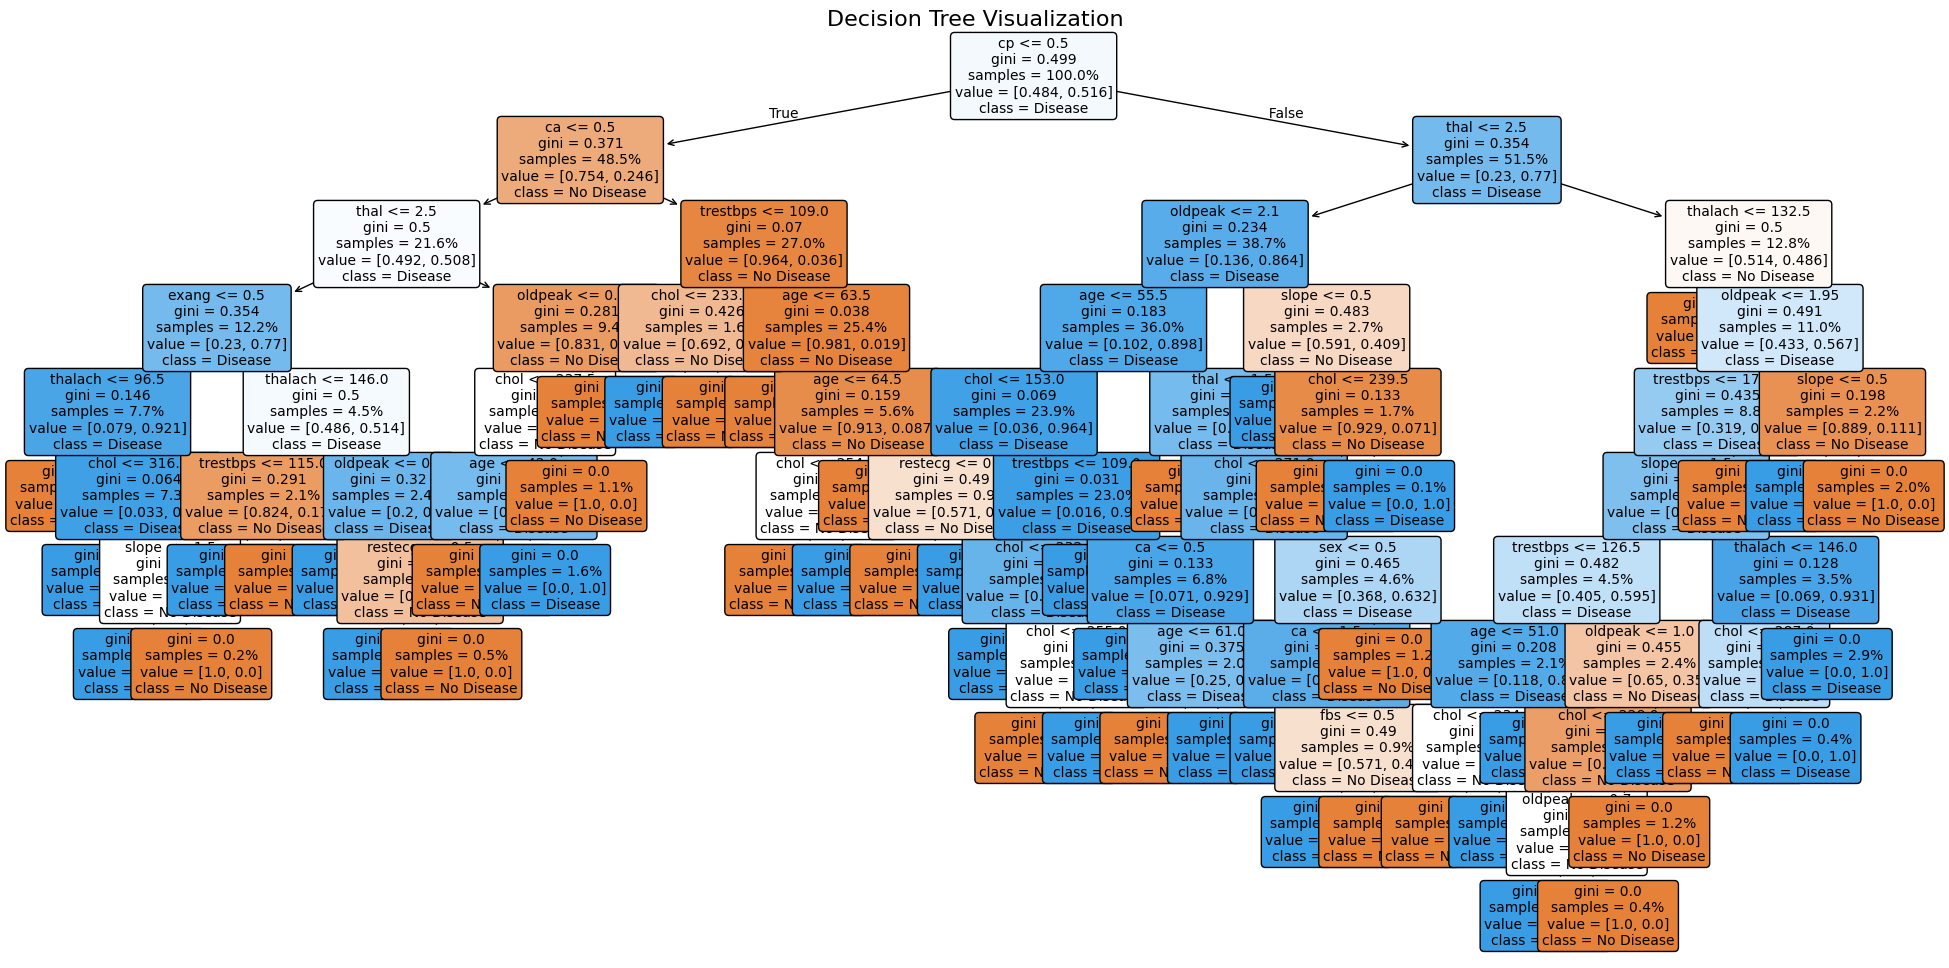

In [14]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(24, 12))
tree.plot_tree(
    dt,
    filled=True,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    impurity=True,          
    proportion=True,       
    rounded=True,           
    fontsize=10            
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()


**<U>Step 3</U>: Analyze Overfitting by Controlling Tree Depth**
* Try with max_depth

In [8]:
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(X_train, y_train)

print("Train accuracy:", dt_pruned.score(X_train, y_train))
print("Test accuracy:", dt_pruned.score(X_test, y_test))

Train accuracy: 0.8829268292682927
Test accuracy: 0.8


**<U>Step 4</U>: Train a Random Forest & Compare Accuracy**

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Random Forest Train Accuracy:", rf.score(X_train, y_train))
print("Random Forest Test Accuracy:", rf.score(X_test, y_test))

Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 0.9853658536585366


**<U>Step 5</U>: Interpret Feature Importances**

In [10]:
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. {X.columns[indices[f]]} ({importances[indices[f]]:.3f})")

Feature ranking:
1. cp (0.135)
2. ca (0.127)
3. thalach (0.122)
4. oldpeak (0.122)
5. thal (0.111)
6. age (0.078)
7. chol (0.075)
8. trestbps (0.071)
9. exang (0.058)
10. slope (0.046)
11. sex (0.029)
12. restecg (0.019)
13. fbs (0.008)


* **Plot**

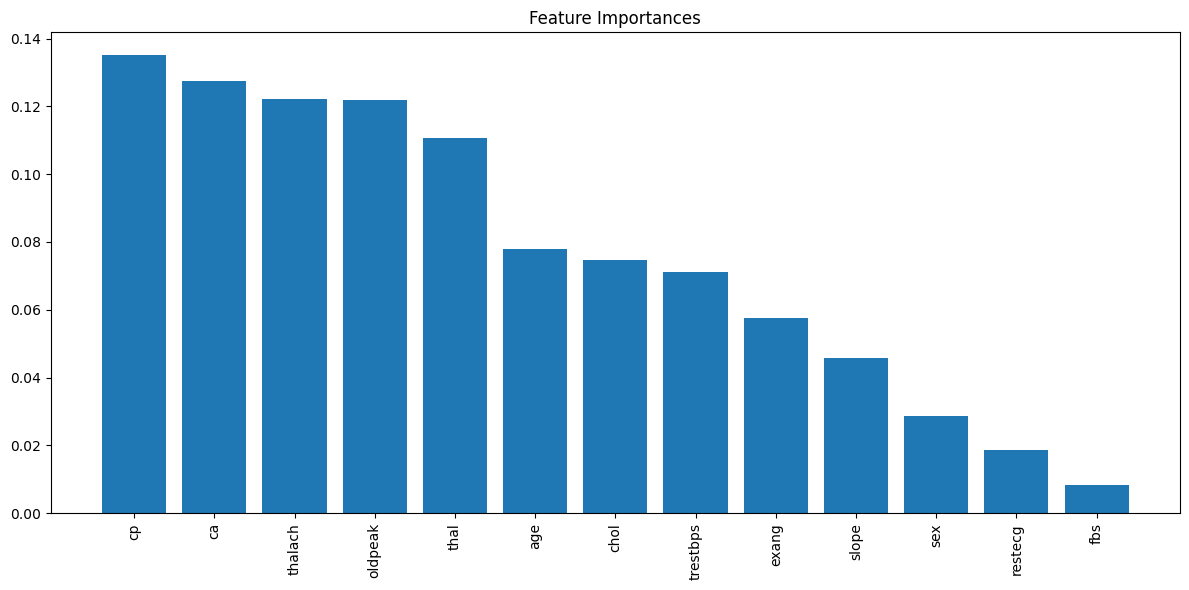

In [11]:
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

**<U>Step 6</U>: Evaluate Using Cross-Validation**

In [12]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [1.         1.         1.         1.         0.98536585]
Mean CV Accuracy: 0.9970731707317073
